In [182]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [183]:
xaim = 2000

rflare = 16500

hcloop = 1670

hdecay = 15

xbar = 1500

al_fnlfl_herrexpmin = 1


gsstp = np.deg2rad(24)
gssh = np.deg2rad(2.8)

tgstp = np.tan(gsstp)
tgsh = np.tan(gssh)

hk = hcloop + rflare*np.cos(gsstp)
    
hctg = hk - rflare*np.cos(gssh) - hdecay

xctg = -hctg/tgsh + xaim

xk = xctg + rflare*np.sin(gssh)

xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp

xe = xctg - xbar
xfce = xk - xe
yfce = np.sqrt(rflare**2 - xfce**2)
he = hk - yfce
ae = he - (xaim - xe) * tgsh

sigmae = ae / (xfce/yfce - tgsh)

def ogs(x):
    return max(0.0, (xa - x) * tgstp)

def flare(x):
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)

    return hk - yflarecir

def flareexp(x):

    herrexp = ae * math.exp((xe - x)/sigmae)
    
    href = igs(x)

    href += min(2 * href, herrexp)
    if (herrexp > al_fnlfl_herrexpmin) :
        return href
    return 0

def igs(x):

    return max(0.0, (xaim - x) * tgsh)

def igs2(x):
    

    return max(0.0, (xaim - x) * tgsh + hdecay)
    
def flarehdot(x):
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)
    
    return -np.rad2deg(np.arctan(xflarecir/yflarecir))

def exphdot(x):
    
    herrexp = ae * math.exp((xe - x)/sigmae)
    
    return -np.rad2deg(np.arctan( tgsh + herrexp/sigmae ))
    

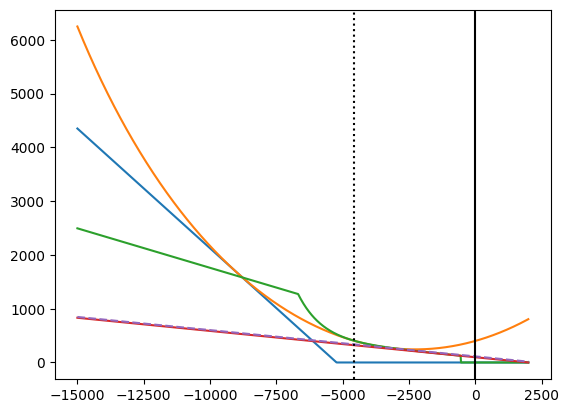

In [184]:
x = np.linspace(-15000, xaim, 1000)

plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x])
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')
plt.axvline(x = 0, color = 'k')

plt.axvline(x =  xe, color = 'k', linestyle = ':')


(0.0, 500.0)

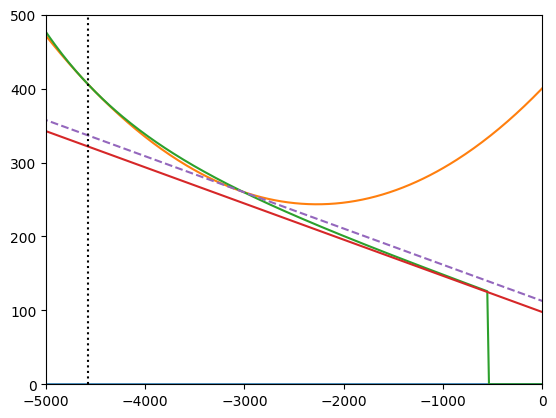

In [185]:
plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x])
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')

plt.axvline(x =  xe, color = 'k', linestyle = ':')

plt.xlim([-5000, 0])
plt.ylim([0, 500])

-10951.095177025803 -4959.660457803143
-9.385957547969008 -10.743627450976525


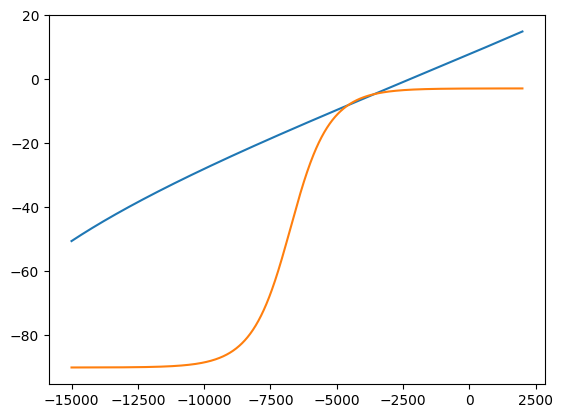

In [186]:
print(-10951.095177025803, -4959.660457803143)

print(flarehdot(-4959.660457803143), exphdot(-4959.660457803143))


plt.figure()

plt.plot(x, [flarehdot(x_) for x_ in x])
plt.plot(x, [exphdot(x_) for x_ in x])

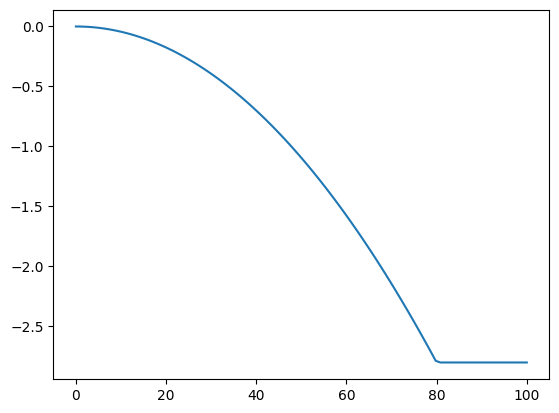

In [187]:
def fnlflhdot(h):
    
    sigma_h_exp = 1 / tgsh
    h0 = 80
    
    flare_hdot = (h/h0)**2 * tgsh
    
    hdot_prof = min(tgsh, flare_hdot)
    
    return -np.rad2deg(np.arctan(hdot_prof))
    

h = np.linspace(0, 100, 100)
plt.plot(h, [fnlflhdot(h_) for h_ in h])

